# LV 4: Word Embeddings i Semantička Sličnost

---

## 1. Uvod u Word Embeddings

Word embeddings predstavljaju tehniku prikaza riječi u numeričkom obliku ("vektori riječi") gdje su slične riječi (po značenju) smještene blizu u vektorskom prostoru. Umjesto rada s pojedinačnim riječima, tekstualne podatke modeliramo kao skup vektora koji dobro zadržavaju semantičke odnose. Time omogućujemo računalima napredno razumijevanje značenja riječi, pa se embeddingi koriste u zadacima poput prepoznavanja sinonima, pronalaženja antonima, mjerenja sličnosti rečenica i mnogim naprednim aplikacijama obrade jezika.

### Najčešće korištene tehnike:
- **Word2Vec**: model treniran na temelju konteksta riječi (CBOW i Skip-gram)
- **GloVe** (Global Vectors): kombinira globalnu statistiku i lokalni kontekst
- **FastText**: proširenje Word2Veca koje uključuje podriječi

### Korištenjem pretreniranih modela embeddinga možemo:
- Lako pronaći slične i suprotne riječi
- Vizualizirati prostorne odnose između pojmova (PCA, t-SNE)
- Mjeriti sličnost između rečenica ili dokumenata
- Koristiti embeddinge kao ulazne podatke za napredne NLP modele

Nakon ove vježbe studenti će moći raditi s embeddingima, razumjeti kako oni predstavljaju značenje riječi te koristiti embeddinge za analizu sličnosti i semantičkih odnosa u tekstu.

---



## 2. Korištene biblioteke

U ovoj vježbi koristimo:

**gensim**  
Biblioteka za rad s word embeddingima, uključuje:
- Učitavanje pretreniranih Word2Vec i GloVe modela
- Računanje semantičke sličnosti
- Operacije s vektorima riječi

**scikit-learn**  
Za smanjenje dimenzionalnosti i vizualizaciju (PCA, t-SNE).

**matplotlib**  
Za crtanje grafova i vizualizacija embedding prostora.

**numpy**  
Za matematičke operacije s vektorima.

---


In [1]:
!pip install -q gensim numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 19.0 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3. Inicijalizacija okruženja i učitavanje modela

---

### Primjer: Učitavanje pretreniranog Word2Vec modela

Gensim biblioteka omogućuje jednostavno preuzimanje različitih pretreniranih modela. U ovom primjeru koristimo **glove-wiki-gigaword-50**, manji model (50 dimenzija) pogodan za brzo testiranje.

Možete koristiti i veće modele poput:
- `glove-wiki-gigaword-100`
- `glove-wiki-gigaword-200`
- `word2vec-google-news-300` (vrlo velik, potrebno više vremena)


In [3]:
print("Učitavanje modela...")
model = api.load("glove-wiki-gigaword-50")
print("Model uspješno učitan!")

print(f"Broj riječi u modelu: {len(model)}")

Učitavanje modela...
[==================================================] 100.0% 66.0/66.0MB downloaded
Model uspješno učitan!
Broj riječi u modelu: 400000


---

### Primjer: Prikaz vektora riječi

Svaka riječ u modelu ima svoj vektor (niz brojeva). Duljina vektora ovisi o modelu – ovdje je 50 dimenzija.

Demonstracija kako izgleda embedding za riječ "king".


In [4]:
vector_king = model['king']

print(f"Vektor za riječ 'king' (prvih 10 vrijednosti):")
print(vector_king[:10])

print(f"\nDuljina vektora: {len(vector_king)}")
print(f"Tip podatka: {type(vector_king)}")


Vektor za riječ 'king' (prvih 10 vrijednosti):
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Duljina vektora: 50
Tip podatka: <class 'numpy.ndarray'>


---

### Primjer: Računanje sličnosti između dviju riječi

Embeddings omogućuju mjerenje semantičke sličnosti. Model računa **kosinusnu sličnost** između vektora dviju riječi. Vrijednost je između 0 (potpuno različite) i 1 (identične).


In [5]:

similarity = model.similarity('king', 'queen')
print(f"Sličnost između 'king' i 'queen': {similarity:.4f}")

similarity2 = model.similarity('king', 'apple')
print(f"Sličnost između 'king' i 'apple': {similarity2:.4f}")

similarity3 = model.similarity('computer', 'laptop')
print(f"Sličnost između 'computer' i 'laptop': {similarity3:.4f}")


Sličnost između 'king' i 'queen': 0.7839
Sličnost između 'king' i 'apple': 0.3047
Sličnost između 'computer' i 'laptop': 0.7741


---

### Primjer: Pronalaženje sličnih riječi

Možemo pronaći riječi koje su najbliže (najsličnije) odabranoj riječi, korisno za traženje sinonima.


In [6]:

similar_words = model.most_similar('king', topn=5)

print("5 najsličnijih riječi za 'king':")
for word, score in similar_words:
    print(f"  {word}: {score:.4f}")


5 najsličnijih riječi za 'king':
  prince: 0.8236
  queen: 0.7839
  ii: 0.7746
  emperor: 0.7736
  son: 0.7667


---

### Primjer: Semantičke operacije – Vektorska aritmetika

Jedan od najpoznatijih primjera word embeddinga je **king - man + woman ≈ queen**.

Ovim pristupom možemo "računati" sa značenjima riječi.


In [7]:
# King - man + woman = ?
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

print("king - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

# Paris - France + Italy = ?
result2 = model.most_similar(positive=['paris', 'italy'], negative=['france'], topn=3)

print("\nparis - france + italy =")
for word, score in result2:
    print(f"  {word}: {score:.4f}")


king - man + woman =
  queen (sličnost: 0.8524)

paris - france + italy =
  rome: 0.8466
  milan: 0.7766
  turin: 0.7666


---

### Primjer: Vizualizacija embeddinga pomoću PCA

PCA (Principal Component Analysis) je linearni algoritam koji smanjuje broj dimenzija vektora, zadržavajući što više informacija. Koristimo ga za prikaz riječi u 2D prostoru.

Ovdje ćemo vizualizirati nekoliko odabranih riječi iz različitih domena.


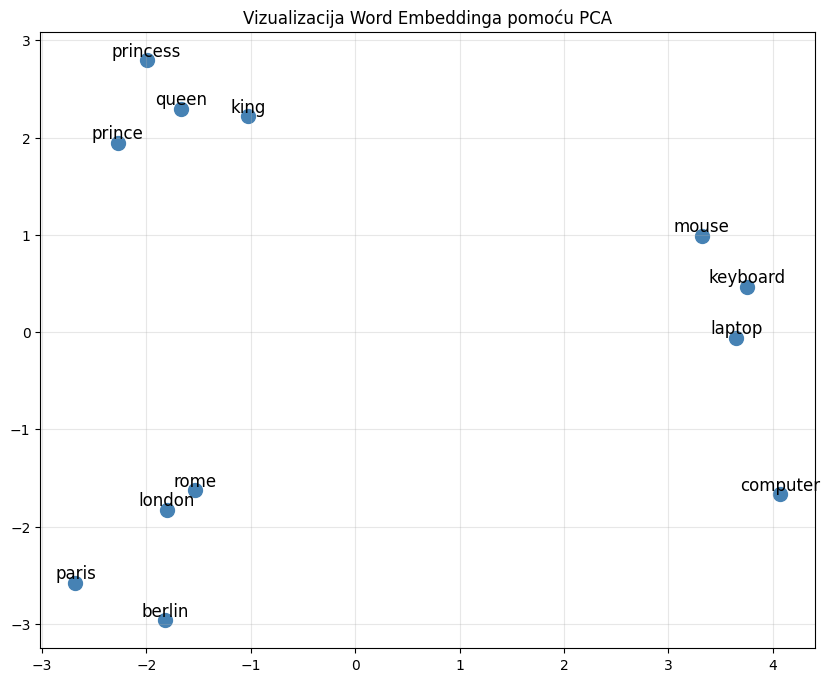

In [8]:
words = ['king', 'queen', 'prince', 'princess',
         'paris', 'london', 'berlin', 'rome',
         'computer', 'laptop', 'keyboard', 'mouse']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
coords = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=100, color='steelblue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću PCA')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Vizualizacija embeddinga pomoću t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je nelinearna tehnika koja bolje čuva lokalne odnose između riječi. Često daje preglednije klastere nego PCA.

**Napomena**: t-SNE može davati različite rezultate pri svakom pokretanju zbog stohastičke prirode algoritma.


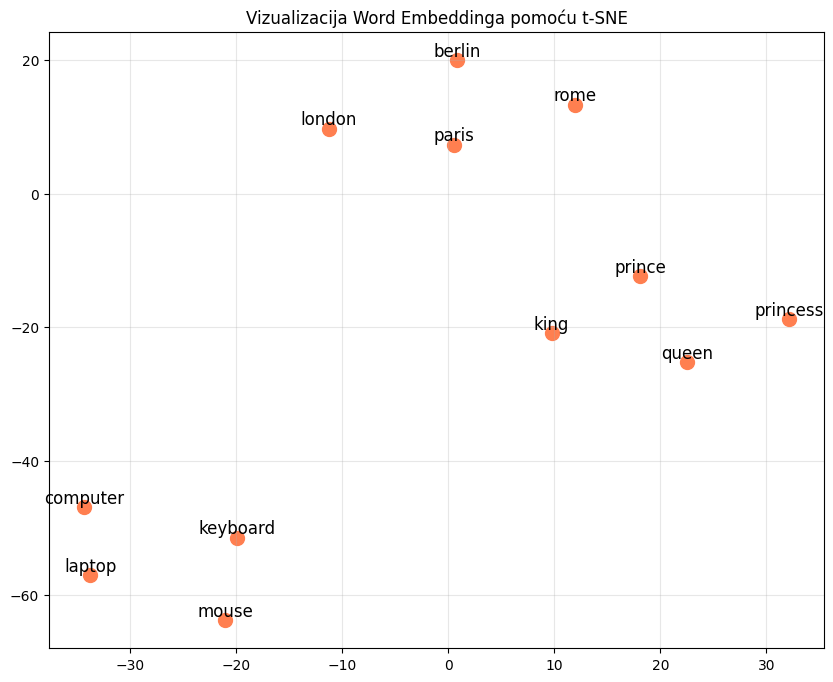

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], s=100, color='coral')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords_tsne[i, 0], coords_tsne[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću t-SNE')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Računanje sličnosti rečenica

Isti pristup možemo proširiti i na rečenice: najjednostavniji način je izračunati prosječni embedding, odnosno prosjek vektora svih riječi u rečenici.

**Napomena**: Ova metoda ne uzima u obzir redoslijed riječi, ali daje korisnu aproksimaciju semantičke sličnosti.


In [10]:
def sentence_vector(sentence, model):
    words = [word.lower() for word in sentence.split() if word.lower() in model]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in words], axis=0)

def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_vector(sent1, model)
    vec2 = sentence_vector(sent2, model)

    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return 0.0

    return dot_product / (norm1 * norm2)


s1 = "The cat sits on the mat."
s2 = "A dog rests on the carpet."
s3 = "I love programming in Python."

print(f"Sličnost između rečenica 1 i 2: {sentence_similarity(s1, s2, model):.4f}")
print(f"Sličnost između rečenica 1 i 3: {sentence_similarity(s1, s3, model):.4f}")
print(f"Sličnost između rečenica 2 i 3: {sentence_similarity(s2, s3, model):.4f}")

Sličnost između rečenica 1 i 2: 0.9715
Sličnost između rečenica 1 i 3: 0.8037
Sličnost između rečenica 2 i 3: 0.8108


## Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

Koristite učitani Word2Vec/GloVe model za istraživanje semantičkih odnosa između riječi. Pronađite sinonime, testirajte vektorsku aritmetiku i analizirajte rezultate.



1. Pronađite 10 najsličnijih riječi za pojam "doctor"
2. Pronađite 10 najsličnijih riječi za pojam "technology"
3. Testirajte vektorsku aritmetiku:
   - king - man + woman = ?
   - doctor - man + woman = ?
   - berlin - germany + france = ?
   - python - programming + cooking = ?
4. Analizirajte rezultate i objasnite koje analogije model dobro prepoznaje, a gdje griješi


In [11]:
similar_words_doctor = model.most_similar('doctor', topn=10)

print("10 najsličnijih riječi doctor:")
for word, score in similar_words_doctor:
    print(f"  {word}: {score:.4f}")


similar_words_technology = model.most_similar('technology', topn=10)

print("\n10 najsličnijih riječi technology:")
for word, score in similar_words_technology:
    print(f"  {word}: {score:.4f}")

result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("\nking - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

result = model.most_similar(positive=['doctor', 'woman'], negative=['man'], topn=1)
print("\ndoctor - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

result = model.most_similar(positive=['berlin', 'france'], negative=['germany'], topn=1)
print("\nberlin - germany + france =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

result = model.most_similar(positive=['python', 'cooking'], negative=['programming'], topn=1)
print("\npython - programming + cooking =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

10 najsličnijih riječi doctor:
  nurse: 0.7977
  physician: 0.7965
  patient: 0.7612
  child: 0.7559
  teacher: 0.7538
  surgeon: 0.7479
  psychiatrist: 0.7422
  doctors: 0.7394
  father: 0.7334
  mother: 0.7284

10 najsličnijih riječi technology:
  technologies: 0.8928
  computer: 0.8526
  systems: 0.8289
  software: 0.8090
  computing: 0.7991
  innovation: 0.7876
  business: 0.7864
  tool: 0.7848
  developed: 0.7802
  research: 0.7735

king - man + woman =
  queen (sličnost: 0.8524)

doctor - man + woman =
  nurse (sličnost: 0.8405)

berlin - germany + france =
  paris (sličnost: 0.9169)

python - programming + cooking =
  roasted (sličnost: 0.6643)


Model vrlo uspješno prepoznaje riječi koje su po značenju bliske pojmovima doktor i tehnologija. Jednadžbe koje smo implementirali davale su stabilna i smis­lena rješenja. Najbolji rezultat postignut je kombinacijom pojmova Berlin-Germany+France, dok je najslabiji rezultat ostvaren s primjerom Python-programming+cooking. Razlog tome je činjenica da u stvarnom svijetu Python i programiranje nemaju jasnu ni prirodnu povezanost s kuhanjem pa model te odnose teže interpretira.


## Zadatak 2: Detekcija outliera - koja riječ ne pripada grupi?





Implementirajte funkciju koja detektira koja riječ ne pripada grupi sličnih riječi. Ovo je praktična primjena u analizi teksta i detekciji anomalija

**Napomena**:  Koristite embedding model za pronalaženje "outliera".

Testirajte sljedeće grupe riječi i pronađite koja riječ ne pripada:

1. ['breakfast', 'lunch', 'dinner', 'cement']
2. ['cat', 'dog', 'mouse', 'computer']
3. ['paris', 'london', 'berlin', 'table']
4. ['happy', 'joyful', 'cheerful', 'angry']
5. ['python', 'java', 'javascript', 'banana']

Za svaku grupu:
- Pronađite outlier riječ
- Izračunajte njenu prosječnu sličnost s ostalim riječima
- Objasnite zašto je detektirana kao outlier


In [12]:
test_groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana']
]

In [13]:
import gensim.downloader as api
from numpy import mean

def find_outlier(words, model):
    valid_words = [w for w in words if w in model.key_to_index]

    if len(valid_words) < len(words):
        missing = set(words) - set(valid_words)
        print(f"Upozorenje: riječi nisu u modelu: {missing}")

    similarities = {}

    for w in valid_words:
        other_words = [x for x in valid_words if x != w]
        sims = [model.similarity(w, o) for o in other_words]
        similarities[w] = mean(sims)

    outlier = min(similarities, key=similarities.get)
    return outlier, similarities[outlier]


In [ ]:
for group in test_groups:
      outlier, avg_sim = find_outlier(group, model)
      print(f"Grupa: {group}")
      print(f" → Outlier: {outlier}")
      print(f" → Prosječna sličnost s ostalim riječima: {avg_sim:.4f}\n")

Grupa: ['breakfast', 'lunch', 'dinner', 'cement']
 → Outlier: cement
 → Prosječna sličnost s ostalim riječima: 0.1079

Grupa: ['cat', 'dog', 'mouse', 'computer']
 → Outlier: computer
 → Prosječna sličnost s ostalim riječima: 0.4032

Grupa: ['paris', 'london', 'berlin', 'table']
 → Outlier: table
 → Prosječna sličnost s ostalim riječima: 0.4166

Grupa: ['happy', 'joyful', 'cheerful', 'angry']
 → Outlier: angry
 → Prosječna sličnost s ostalim riječima: 0.4812

Grupa: ['python', 'java', 'javascript', 'banana']
 → Outlier: banana
 → Prosječna sličnost s ostalim riječima: 0.1410



Model je za svaku kategoriju izbacio točnog uljeza na temelju prosječne sličnosti s drugim pojmovima.

## Zadatak 3: Vizualizacija tematskih klastera pomoću PCA i t-SNE


Vizualizirajte embedding prostor za riječi iz različitih domena (hrana, tehnologija, sport, gradovi). Usporedite PCA i t-SNE vizualizacije.

Koristite sljedeće riječi iz 4 kategorije:
- Hrana: ['pizza', 'burger', 'pasta', 'salad', 'bread']
- Tehnologija: ['computer', 'laptop', 'smartphone', 'tablet', 'software']
- Sport: ['football', 'basketball', 'tennis', 'swimming', 'running']
- Gradovi: ['paris', 'london', 'tokyo', 'berlin', 'rome']

Zadaci:
1. Vizualizirajte sve riječi pomoću PCA u 2D prostoru
2. Vizualizirajte iste riječi pomoću t-SNE
3. Obojite svaku kategoriju različitom bojom
4. Usporedite rezultate i objasnite razlike između PCA i t-SNE


In [14]:
categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

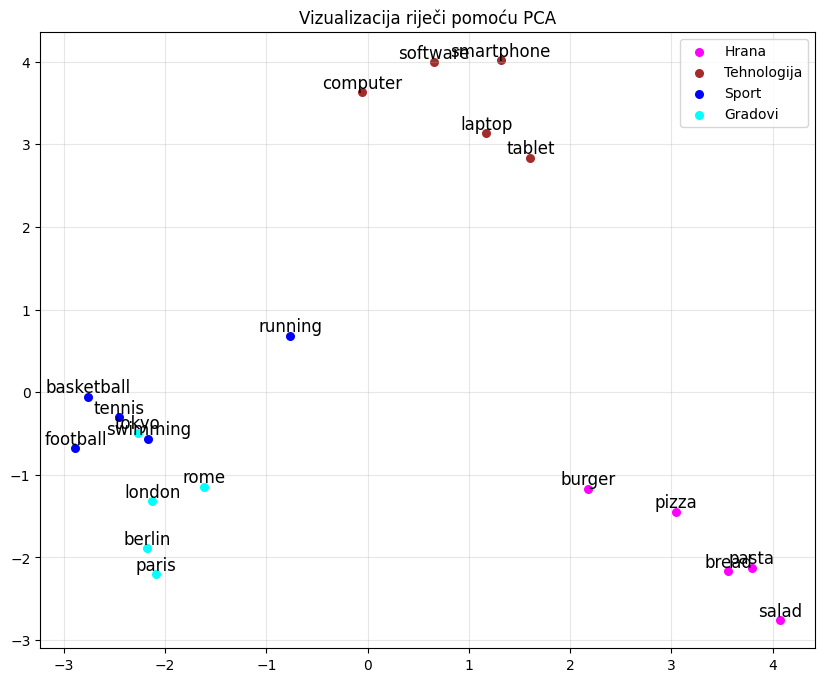

In [15]:
colors = ['magenta', 'brown', 'blue', 'cyan']

all_words = []
for words in categories.values():
    all_words.extend(words)

word_vectors = [model[w] for w in all_words]

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))

offset = 0
for idx, (category_name, category_words) in enumerate(categories.items()):
    length = len(category_words)
    category_coords = vectors_2d[offset:offset + length]

    plt.scatter(
        category_coords[:, 0],
        category_coords[:, 1],
        s=30,
        color=colors[idx],
        label=category_name
    )

    for word, (x, y) in zip(category_words, category_coords):
        plt.annotate(
            word,
            (x, y),
            fontsize=12,
            ha='center',
            va='bottom'
        )

    offset += length

plt.title('Vizualizacija riječi pomoću PCA')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

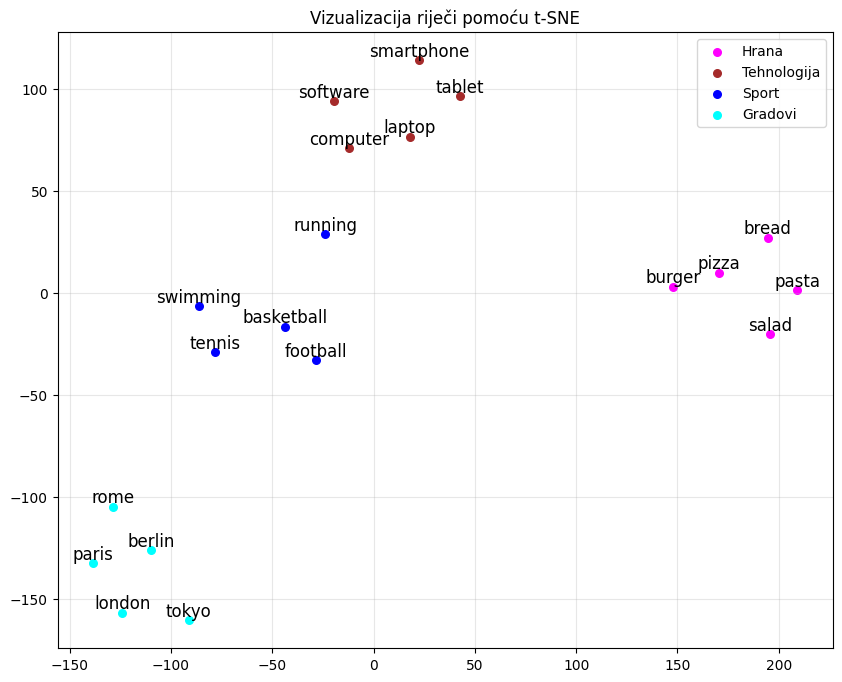

In [17]:
words_vectors = np.asarray(word_vectors)


tsne = TSNE(
    n_components=2,
    perplexity=5,
    random_state=42,
    init='pca'
)

coords_2d = tsne.fit_transform(words_vectors)

plt.figure(figsize=(10, 8))

idx = 0
for i, (category, words) in enumerate(categories.items()):
    n = len(words)
    points = coords_2d[idx:idx + n]

    plt.scatter(
        points[:, 0],
        points[:, 1],
        s=30,
        color=colors[i],
        label=category
    )

    for word, (x, y) in zip(words, points):
        plt.annotate(
            word,
            (x, y),
            fontsize=12,
            ha='center',
            va='bottom'
        )

    idx += n

plt.title('Vizualizacija riječi pomoću t-SNE')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


Oba algoritma su relativno dobro rasporedili riječi u vektorskom prostoru, no t-SNE je nešto bolji što se može vidjeti iz vizualizacije gdje se kod PCA tokyo miješa sa sportovima dok t-SNE je puno bolje te riječi rasporedio u vektorski prostor i nema miješanja.



## Zadatak 4: Semantička sličnost rečenica i analiza tekstova



Implementirajte funkciju za mjerenje sličnosti rečenica i testirajte na različitim parovima rečenica te analizirajte gdje metoda radi dobro, a gdje ima ograničenja.


Funkciju testirajte je na sljedećim parovima rečenica:

1. "The cat sits on the mat." vs "A cat is sitting on a rug."
2. "I love programming in Python." vs "Python programming is my passion."
3. "The weather is nice today." vs "I enjoy coding in Python."
4. "Machine learning is fascinating." vs "Artificial intelligence is interesting."
5. "How do I reset my password?" vs "I forgot my password, how to recover it?"
6. "The quick brown fox jumps." vs "A fast auburn fox leaps."

Zadaci:
1. Implementirajte funkciju sentence_similarity() koja računa prosječni embedding
2. Izračunajte sličnost za sve parove
3. Analizirajte rezultate - koje parove model prepoznaje kao slične?
4. Identificirajte ograničenja metode prosječnog embeddinga
5. Predložite moguća poboljšanja


In [18]:
sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

In [19]:
for pair in sentence_pairs:
    s1, s2 = pair
    similarity = sentence_similarity(s1, s2, model)
    print(f"Sličnost između rečenica '{s1}' i '{s2}': {similarity:.4f}")

Sličnost između rečenica 'The cat sits on the mat.' i 'A cat is sitting on a rug.': 0.9562
Sličnost između rečenica 'I love programming in Python.' i 'Python programming is my passion.': 0.8971
Sličnost između rečenica 'The weather is nice today.' i 'I enjoy coding in Python.': 0.8847
Sličnost između rečenica 'Machine learning is fascinating.' i 'Artificial intelligence is interesting.': 0.8330
Sličnost između rečenica 'How do I reset my password?' i 'I forgot my password, how to recover it?': 0.9668
Sličnost između rečenica 'The quick brown fox jumps.' i 'A fast auburn fox leaps.': 0.9140


Veliki postotak rečenica je sličan stvarno osim trećih rečenica te to model nije prepznao. Usporedio je lijepo vrijeme s uživanjem u kodiranju pythona što nema nikakve povezanosti. Model se može poboljšati tako što će se ukloniti stopwords kod rečenica kako bi se izdvojile samo kontekste riječi te na njima napravile usporedbe.